https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02
https://discuss.analyticsvidhya.com/t/labelencoder-how-to-reverse-it/11497

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from pract2_utils import *

In [2]:
data = pd.read_csv("../datasets/accidentes_2013.csv", na_values=["?"])
data.shape

(89519, 32)

In [3]:
data.head()

,MES,HORA,DIASEMANA,PROVINCIA,COMUNIDAD_AUTONOMA,ISLA,TOT_VICTIMAS,TOT_VICTIMAS30D,TOT_MUERTOS,TOT_MUERTOS30D,...,PRIORIDAD,SUPERFICIE_CALZADA,LUMINOSIDAD,FACTORES_ATMOSFERICOS,VISIBILIDAD_RESTRINGIDA,OTRA_CIRCUNSTANCIA,ACERAS,TIPO_ACCIDENTE,DENSIDAD_CIRCULACION,MEDIDAS_ESPECIALES
0,8,14.0,3,Bizkaia,País Vasco,NO_ES_ISLA,3,3,0,0.054104,...,NINGUNA (SOLO NORMA),MOJADA,PLENO DÍA,LLUVIA FUERTE,FACTORES ATMOSFÉRICOS,OTRA,NO HAY ACERA,Colisión de vehículos en marcha (Frontal),FLUIDA,NINGUNA MEDIDA
1,6,18.0,6,Bizkaia,País Vasco,NO_ES_ISLA,1,1,0,0.000000,...,SEMÁFORO,MOJADA,PLENO DÍA,LLOVIZNANDO,OTRA_CAUSA,NINGUNA,NO HAY ACERA,Colisión de vehículos en marcha (Alcance),DENSA,NINGUNA MEDIDA
2,11,17.0,2,Tarragona,Cataluña,NO_ES_ISLA,2,2,0,0.000000,...,SEÑAL DE STOP,SECA Y LIMPIA,PLENO DÍA,BUEN TIEMPO,NaN,NINGUNA,NO HAY ACERA,Colisión de vehículos en marcha (Frontolateral),NaN,NaN
3,1,9.0,3,Lleida,Cataluña,NO_ES_ISLA,2,2,0,0.000000,...,NaN,MOJADA,PLENO DÍA,LLOVIZNANDO,NaN,NINGUNA,NO HAY ACERA,Colisión de vehículos en marcha (Múltiple o en...,NaN,NINGUNA MEDIDA
4,11,22.0,7,Barcelona,Cataluña,NO_ES_ISLA,2,2,0,0.000000,...,NaN,MOJADA,NOCHE: ILUMINACIÓN SUFICIENTE,LLUVIA FUERTE,NaN,NINGUNA,NO HAY ACERA,Colisión de vehículos en marcha (Frontolateral),NaN,NaN


In [4]:
cols = data.columns.tolist()
print(cols)

['MES', 'HORA', 'DIASEMANA', 'PROVINCIA', 'COMUNIDAD_AUTONOMA', 'ISLA', 'TOT_VICTIMAS', 'TOT_VICTIMAS30D', 'TOT_MUERTOS', 'TOT_MUERTOS30D', 'TOT_HERIDOS_GRAVES', 'TOT_HERIDOS_GRAVES30D', 'TOT_HERIDOS_LEVES', 'TOT_HERIDOS_LEVES30D', 'TOT_VEHICULOS_IMPLICADOS', 'ZONA', 'ZONA_AGRUPADA', 'RED_CARRETERA', 'TIPO_VIA', 'TRAZADO_NO_INTERSEC', 'TIPO_INTERSEC', 'ACOND_CALZADA', 'PRIORIDAD', 'SUPERFICIE_CALZADA', 'LUMINOSIDAD', 'FACTORES_ATMOSFERICOS', 'VISIBILIDAD_RESTRINGIDA', 'OTRA_CIRCUNSTANCIA', 'ACERAS', 'TIPO_ACCIDENTE', 'DENSIDAD_CIRCULACION', 'MEDIDAS_ESPECIALES']


In [5]:
cols = data.columns.tolist()
for i in cols:
    print(i)
    print(data[i].unique())

MES
[ 8  6 11  1 10  4  5  9  3 12  2  7]
HORA
[14.         18.         17.         ...  5.3        15.7
 19.18333333]
DIASEMANA
[3 6 2 7 4 1 5]
PROVINCIA
['Bizkaia' 'Tarragona' 'Lleida' 'Barcelona' 'Girona' 'Gipuzkoa'
 'Araba/Álava' 'Albacete' 'Alicante/Alacant' 'Almería' 'Ávila' 'Badajoz'
 'Balears, Illes' 'Burgos' 'Cáceres' 'Cádiz' 'Castellón/Castelló'
 'Ciudad Real' 'Córdoba' 'Coruña, A' 'Cuenca' 'Granada' 'Guadalajara'
 'Huelva' 'Huesca' 'Jaén' 'León' 'Rioja, La' 'Lugo' 'Madrid' 'Málaga'
 'Murcia' 'Navarra' 'Ourense' 'Asturias' 'Palencia' 'Palmas, Las'
 'Pontevedra' 'Salamanca' 'S.C.Tenerife' 'Cantabria' 'Segovia' 'Sevilla'
 'Soria' 'Teruel' 'Toledo' 'Valencia/València' 'Valladolid' 'Zamora'
 'Zaragoza' 'Ceuta' 'Melilla']
COMUNIDAD_AUTONOMA
['País Vasco' 'Cataluña' 'Castilla-La Mancha' 'Comunitat Valenciana'
 'Andalucía' 'Castilla y León' 'Extremadura' 'Balears, Illes' 'Galicia'
 'Aragón' 'Rioja, La' 'Madrid, Comunidad de' 'Murcia, Región de'
 'Navarra, Comunidad Foral de' 'Asturi

In [6]:
#case1 = data[(data.COMUNIDAD_AUTONOMA=='Andalucía') & (data.HORA>=11) & (data.HORA<=18)]
case1_x = data[(data.TIPO_INTERSEC=='ENLACE DE SALIDA')]
case1_y = data[(data.TIPO_INTERSEC=='ENLACE DE ENTRADA')]

[Text(0, 0, 'AUTOPISTA'),
 Text(0, 0, 'AUTOVÍA'),
 Text(0, 0, 'CAMINO VECINAL'),
 Text(0, 0, 'OTRO TIPO'),
 Text(0, 0, 'RAMAL DE ENLACE'),
 Text(0, 0, 'VÍA CONVENCIONAL'),
 Text(0, 0, 'VÍA DE SERVICIO'),
 Text(0, 0, 'VÍA PARA AUTOMÓVILES')]

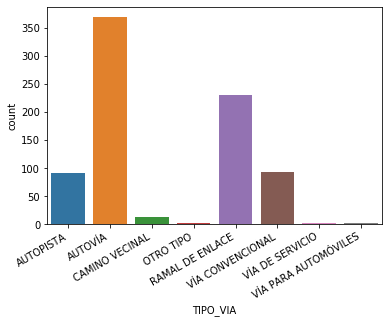

In [7]:
ax = sns.countplot(x="TIPO_VIA", data=case1_x)
ax.set_xticklabels(np.unique(case1_x['TIPO_VIA'].tolist()), rotation=30, ha='right')

[Text(0, 0, 'AUTOPISTA'),
 Text(0, 0, 'AUTOVÍA'),
 Text(0, 0, 'CAMINO VECINAL'),
 Text(0, 0, 'OTRO TIPO'),
 Text(0, 0, 'RAMAL DE ENLACE'),
 Text(0, 0, 'VÍA CONVENCIONAL'),
 Text(0, 0, 'VÍA DE SERVICIO'),
 Text(0, 0, 'VÍA PARA AUTOMÓVILES')]

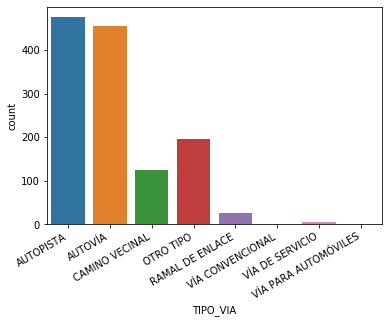

In [8]:
ax = sns.countplot(x="TIPO_VIA", data=case1_y)
ax.set_xticklabels(np.unique(case1_y['TIPO_VIA'].tolist()), rotation=30, ha='right')

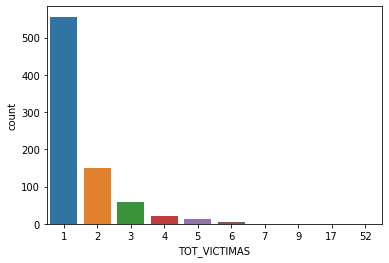

In [9]:
ax = sns.countplot(x="TOT_VICTIMAS", data=case1_x)

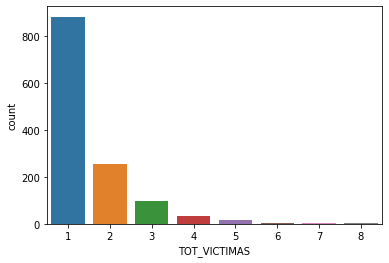

In [10]:
ax = sns.countplot(x="TOT_VICTIMAS", data=case1_y)

[Text(0, 0, 'Atropello a animales sueltos'),
 Text(0, 0, 'Atropello a peatón aislado o en grupo'),
 Text(0, 0, 'Atropello a peatón sosteniendo bicicleta'),
 Text(0, 0, 'Colisión de vehículo con obstáculo en calzada (Otro objeto o material)'),
 Text(0, 0, 'Colisión de vehículo con obstáculo en calzada (Valla de defensa)'),
 Text(0, 0, 'Colisión de vehículo con obstáculo en calzada (Vehículo estacionado o averiado)'),
 Text(0, 0, 'Colisión de vehículos en marcha (Alcance)'),
 Text(0, 0, 'Colisión de vehículos en marcha (Frontal)'),
 Text(0, 0, 'Colisión de vehículos en marcha (Frontolateral)'),
 Text(0, 0, 'Colisión de vehículos en marcha (Lateral)'),
 Text(0, 0, 'Colisión de vehículos en marcha (Múltiple o en caravana)'),
 Text(0, 0, 'Otro tipo de accidente'),
 Text(0, 0, 'Salida de la vía por la derecha con colisión (Choque con cuneta o bordillo)'),
 Text(0, 0, 'Salida de la vía por la derecha con colisión (Choque con muro o edifício)'),
 Text(0, 0, 'Salida de la vía por la derecha con

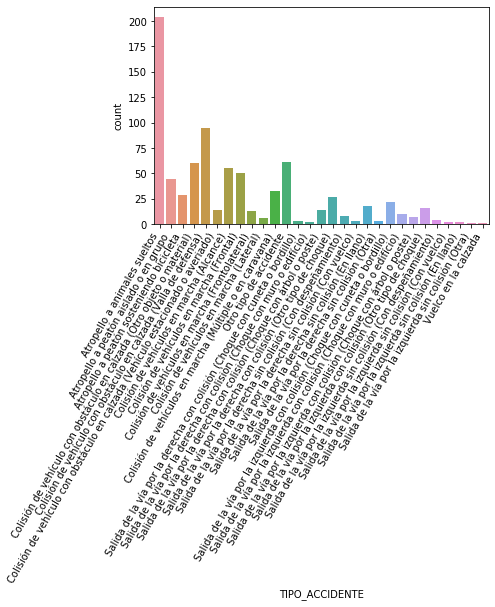

In [11]:
ax = sns.countplot(x="TIPO_ACCIDENTE", data=case1_x)
ax.set_xticklabels(np.unique(case1_x['TIPO_ACCIDENTE'].tolist()), rotation=60, ha='right')

[Text(0, 0, 'Atropello a animales sueltos'),
 Text(0, 0, 'Atropello a peatón aislado o en grupo'),
 Text(0, 0, 'Colisión de vehículo con obstáculo en calzada (Otro objeto o material)'),
 Text(0, 0, 'Colisión de vehículo con obstáculo en calzada (Valla de defensa)'),
 Text(0, 0, 'Colisión de vehículo con obstáculo en calzada (Vehículo estacionado o averiado)'),
 Text(0, 0, 'Colisión de vehículos en marcha (Alcance)'),
 Text(0, 0, 'Colisión de vehículos en marcha (Frontal)'),
 Text(0, 0, 'Colisión de vehículos en marcha (Frontolateral)'),
 Text(0, 0, 'Colisión de vehículos en marcha (Lateral)'),
 Text(0, 0, 'Colisión de vehículos en marcha (Múltiple o en caravana)'),
 Text(0, 0, 'Otro tipo de accidente'),
 Text(0, 0, 'Salida de la vía por la derecha con colisión (Choque con cuneta o bordillo)'),
 Text(0, 0, 'Salida de la vía por la derecha con colisión (Choque con muro o edifício)'),
 Text(0, 0, 'Salida de la vía por la derecha con colisión (Choque con árbol o poste)'),
 Text(0, 0, 'Sali

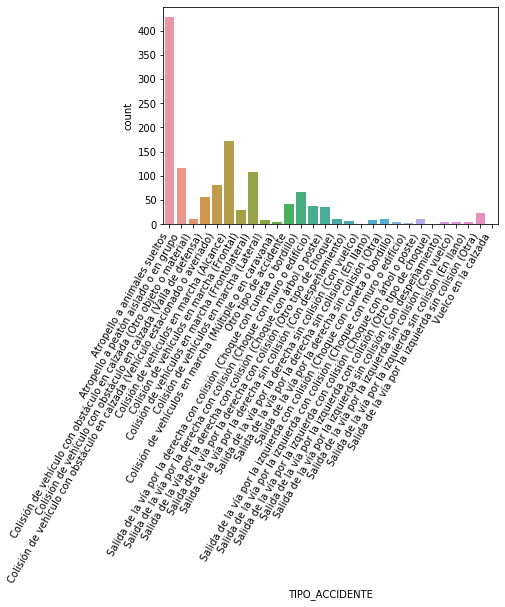

In [12]:
ax = sns.countplot(x="TIPO_ACCIDENTE", data=case1_y)
ax.set_xticklabels(np.unique(case1_y['TIPO_ACCIDENTE'].tolist()), rotation=60, ha='right')

In [13]:
# One Hot Encoding 
df_x = pd.get_dummies(case1_x, prefix=['via','accidente'], columns=['TIPO_VIA','TIPO_ACCIDENTE'])
from sklearn.preprocessing import OneHotEncoder
ohc = OneHotEncoder()
ohe = ohc.fit_transform(case1_x.TIPO_VIA.values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(ohe, columns=["Via_"+str(ohc.categories_[0][i]) for i in range(len(ohc.categories_[0]))])

dfh = pd.concat([df_x, dfOneHot], axis=1)

df_y = pd.get_dummies(case1_y, prefix=['via','accidente'], columns=['TIPO_VIA','TIPO_ACCIDENTE'])
ohc = OneHotEncoder()
ohe = ohc.fit_transform(case1_y.TIPO_VIA.values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(ohe, columns=["Via_"+str(ohc.categories_[0][i]) for i in range(len(ohc.categories_[0]))])

dfh = pd.concat([df_y, dfOneHot], axis=1)

dfh

,MES,HORA,DIASEMANA,PROVINCIA,COMUNIDAD_AUTONOMA,ISLA,TOT_VICTIMAS,TOT_VICTIMAS30D,TOT_MUERTOS,TOT_MUERTOS30D,...,accidente_Salida de la vía por la izquierda sin colisión (Otra),accidente_Vuelco en la calzada,Via_AUTOPISTA,Via_AUTOVÍA,Via_CAMINO VECINAL,Via_OTRO TIPO,Via_RAMAL DE ENLACE,Via_VÍA CONVENCIONAL,Via_VÍA DE SERVICIO,Via_VÍA PARA AUTOMÓVILES
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88849,12.0,19.000000,1.0,Zaragoza,Aragón,NO_ES_ISLA,2.0,2.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88876,10.0,8.083333,4.0,Zaragoza,Aragón,NO_ES_ISLA,1.0,1.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88878,3.0,19.083333,4.0,Zaragoza,Aragón,NO_ES_ISLA,1.0,1.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88887,1.0,19.750000,4.0,Zaragoza,Aragón,NO_ES_ISLA,1.0,1.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
lex = LabelEncoder()
ley = LabelEncoder()
df_x['Via'] = lex.fit_transform(case1_x.TIPO_VIA)
df_y['Via'] = ley.fit_transform(case1_y.TIPO_VIA)
# factorize columns
df_x.loc[:, 'Via'] = pd.factorize(case1_x['TIPO_VIA'])[0].reshape(-1,1)
df_y.loc[:, 'Via'] = pd.factorize(case1_y['TIPO_VIA'])[0].reshape(-1,1)

df_x['Via'].value_counts(dropna=False)
df_y['Via'].value_counts(dropna=False)

0    475
1    455
3    196
2    125
4     26
6      5
7      2
5      2
Name: Via, dtype: int64

In [15]:
# Label encoding
lex = LabelEncoder()
ley = LabelEncoder()
df_x['Accidente'] = lex.fit_transform(case1_x.TIPO_ACCIDENTE)
df_y['Accidente'] = ley.fit_transform(case1_y.TIPO_ACCIDENTE)
# factorize columns
df_x.loc[:, 'Accidente'] = pd.factorize(case1_x['TIPO_ACCIDENTE'])[0].reshape(-1,1)
df_y.loc[:, 'Accidente'] = pd.factorize(case1_y['TIPO_ACCIDENTE'])[0].reshape(-1,1)

df_x['Accidente'].value_counts(dropna=False)
df_y['Accidente'].value_counts(dropna=False)

0     428
5     172
1     115
7     108
4      80
11     66
3      55
10     42
12     37
13     36
6      30
26     23
21     11
2      11
18     11
14     10
17      9
8       9
15      7
23      5
9       4
19      4
24      4
25      4
20      2
16      1
22      1
27      1
Name: Accidente, dtype: int64

In [16]:
df_x

,MES,HORA,DIASEMANA,PROVINCIA,COMUNIDAD_AUTONOMA,ISLA,TOT_VICTIMAS,TOT_VICTIMAS30D,TOT_MUERTOS,TOT_MUERTOS30D,...,accidente_Salida de la vía por la izquierda con colisión (Choque con muro o edifício),accidente_Salida de la vía por la izquierda con colisión (Choque con árbol o poste),accidente_Salida de la vía por la izquierda con colisión (Otro tipo de choque),accidente_Salida de la vía por la izquierda sin colisión (Con despeñamiento),accidente_Salida de la vía por la izquierda sin colisión (Con vuelco),accidente_Salida de la vía por la izquierda sin colisión (En llano),accidente_Salida de la vía por la izquierda sin colisión (Otra),accidente_Vuelco en la calzada,Via,Accidente
1,6,18.000000,6,Bizkaia,País Vasco,NO_ES_ISLA,1,1,0,0.000000,...,0,0,0,0,0,0,0,0,0,0
23,7,16.000000,1,Bizkaia,País Vasco,NO_ES_ISLA,1,1,0,0.000000,...,0,0,0,0,0,0,0,0,1,1
41,5,7.000000,4,Gipuzkoa,País Vasco,NO_ES_ISLA,4,4,0,0.000000,...,0,0,0,0,0,0,0,0,1,2
176,9,15.000000,2,Bizkaia,País Vasco,NO_ES_ISLA,2,2,0,0.000000,...,0,0,0,0,0,0,0,0,2,3
781,9,17.000000,3,Gipuzkoa,País Vasco,NO_ES_ISLA,1,1,0,0.018035,...,0,0,0,0,0,0,0,0,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88562,7,14.333333,4,Zaragoza,Aragón,NO_ES_ISLA,3,3,0,0.000000,...,0,0,0,0,0,0,0,0,1,0
88567,6,16.500000,4,Zaragoza,Aragón,NO_ES_ISLA,1,1,0,0.000000,...,0,0,0,0,0,0,0,0,1,0
88725,8,18.500000,6,Zaragoza,Aragón,NO_ES_ISLA,4,4,0,0.000000,...,0,0,0,0,0,0,0,0,1,0
89116,1,14.000000,5,Melilla,Ceuta y Melilla,NO_ES_ISLA,2,2,0,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [17]:
atributos = [
 'TOT_VICTIMAS',
 #'TOT_VICTIMAS30D',
 'TOT_MUERTOS',
 #'TOT_MUERTOS30D',
 'TOT_HERIDOS_GRAVES',
 #'TOT_HERIDOS_GRAVES30D',
 'TOT_HERIDOS_LEVES',
 #'TOT_HERIDOS_LEVES30D',
 'TOT_VEHICULOS_IMPLICADOS']
 #'Via',
 #'Accidente']

datam_x = to_matrix(df_x, atributos)
datam_y = to_matrix(df_y, atributos)
# data normalization
data_norm_x = norm(datam_x)
data_norm_y = norm(datam_y)


In [18]:
k = 7

# K-Means

In [19]:
from sklearn.cluster import KMeans
import random
#seed = random.randrange(2**32 - 1)
#seed = 3631543070 # 1
#seed = 3704691463 # 2
seed = 544539363 # 3
results_x = KMeans(n_clusters=k, random_state=seed).fit(data_norm_x)
results_y = KMeans(n_clusters=k, random_state=seed).fit(data_norm_y)

labels_x = results_x.labels_
centroids_x = results_x.cluster_centers_

labels_y = results_y.labels_
centroids_y = results_y.cluster_centers_

silhouette_x, calinski_x = measures_silhoutte_calinski(data_norm_x, labels_x)
silhouette_y, calinski_y = measures_silhoutte_calinski(data_norm_y, labels_y)

In [20]:
seed

544539363

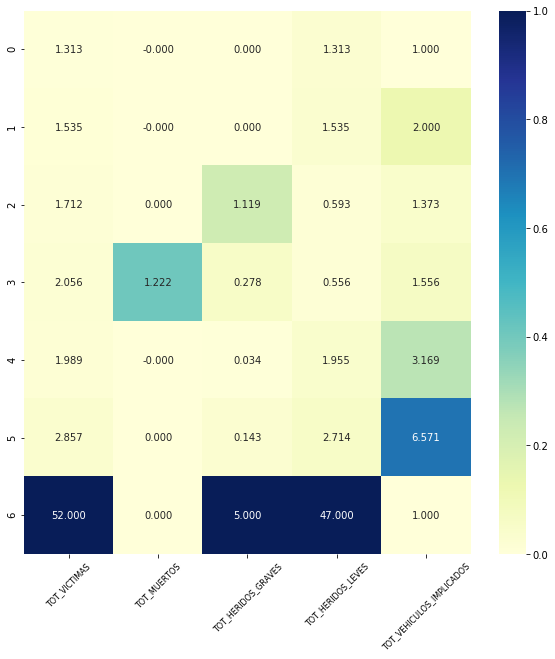

In [72]:
visualize_centroids(centroids_x, datam_x, atributos, 1, 'kmeans', 'salida', k)

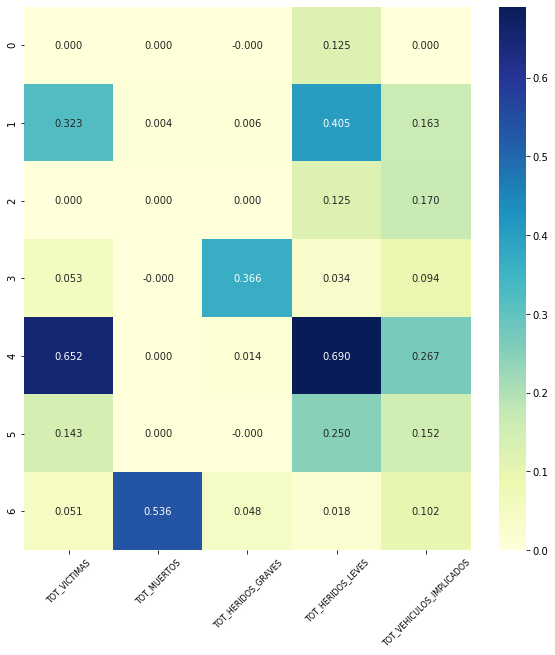

In [22]:
visualize_centroids(centroids_y, data_norm_y, atributos, 1, 'kmeans', 'entrada', k)

In [23]:
df_x

,MES,HORA,DIASEMANA,PROVINCIA,COMUNIDAD_AUTONOMA,ISLA,TOT_VICTIMAS,TOT_VICTIMAS30D,TOT_MUERTOS,TOT_MUERTOS30D,...,accidente_Salida de la vía por la izquierda con colisión (Choque con muro o edifício),accidente_Salida de la vía por la izquierda con colisión (Choque con árbol o poste),accidente_Salida de la vía por la izquierda con colisión (Otro tipo de choque),accidente_Salida de la vía por la izquierda sin colisión (Con despeñamiento),accidente_Salida de la vía por la izquierda sin colisión (Con vuelco),accidente_Salida de la vía por la izquierda sin colisión (En llano),accidente_Salida de la vía por la izquierda sin colisión (Otra),accidente_Vuelco en la calzada,Via,Accidente
1,6,18.000000,6,Bizkaia,País Vasco,NO_ES_ISLA,1,1,0,0.000000,...,0,0,0,0,0,0,0,0,0,0
23,7,16.000000,1,Bizkaia,País Vasco,NO_ES_ISLA,1,1,0,0.000000,...,0,0,0,0,0,0,0,0,1,1
41,5,7.000000,4,Gipuzkoa,País Vasco,NO_ES_ISLA,4,4,0,0.000000,...,0,0,0,0,0,0,0,0,1,2
176,9,15.000000,2,Bizkaia,País Vasco,NO_ES_ISLA,2,2,0,0.000000,...,0,0,0,0,0,0,0,0,2,3
781,9,17.000000,3,Gipuzkoa,País Vasco,NO_ES_ISLA,1,1,0,0.018035,...,0,0,0,0,0,0,0,0,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88562,7,14.333333,4,Zaragoza,Aragón,NO_ES_ISLA,3,3,0,0.000000,...,0,0,0,0,0,0,0,0,1,0
88567,6,16.500000,4,Zaragoza,Aragón,NO_ES_ISLA,1,1,0,0.000000,...,0,0,0,0,0,0,0,0,1,0
88725,8,18.500000,6,Zaragoza,Aragón,NO_ES_ISLA,4,4,0,0.000000,...,0,0,0,0,0,0,0,0,1,0
89116,1,14.000000,5,Melilla,Ceuta y Melilla,NO_ES_ISLA,2,2,0,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [24]:
from collections import Counter

In [25]:
# centroid instances
Counter(labels_x)

Counter({4: 89, 1: 342, 0: 291, 2: 59, 3: 18, 5: 7, 6: 1})

In [26]:
Counter(labels_y)

Counter({0: 261, 1: 118, 2: 535, 3: 102, 5: 233, 4: 23, 6: 14})

In [27]:
#pairplot(df_x, atributos, labels_x, 2, 'kmeans', 'salida', k)

In [28]:
#pairplot(df_y, atributos, labels_y, 2, 'kmeans', 'entrada', k)

# Agglomerative Clustering

In [29]:
# https://towardsdatascience.com/machine-learning-algorithms-part-12-hierarchical-agglomerative-clustering-example-in-python-1e18e0075019
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
results = model.fit(data_norm_x)
labels_ag_x = results.labels_

# get centroids
df_data = pd.DataFrame(data_norm_x)
df_data.columns = atributos
df_data['cluster'] = labels_ag_x
df_centroides = df_data.groupby('cluster').mean()
centroids_ag_x = df_centroides.values

silhouette_ag_x, calinski_ag_x = measures_silhoutte_calinski(data_norm_x, labels_ag_x)

In [30]:
model = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
results = model.fit(data_norm_y)
labels_ag_y = results.labels_

# get centroids
df_data = pd.DataFrame(data_norm_y)
df_data.columns = atributos
df_data['cluster'] = labels_ag_y
df_centroides = df_data.groupby('cluster').mean()
centroids_ag_y = df_centroides.values

silhouette_ag_y, calinski_ag_y = measures_silhoutte_calinski(data_norm_y, labels_ag_y)

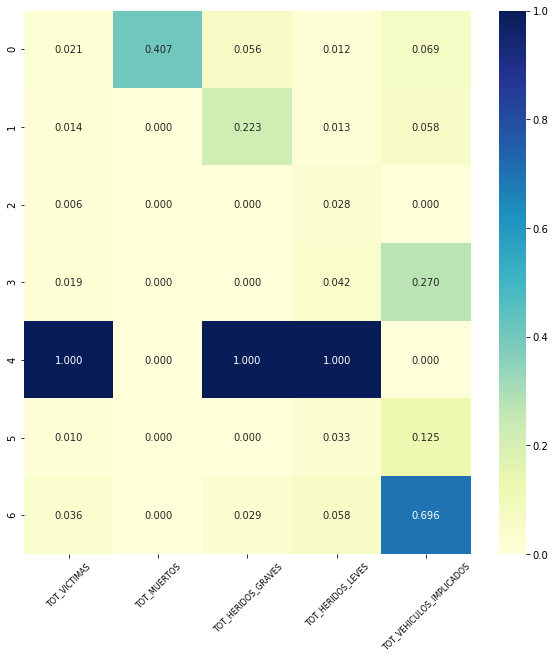

In [31]:
visualize_centroids(centroids_ag_x, data_norm_x, atributos, 1, 'agglomerative', 'salida', k)

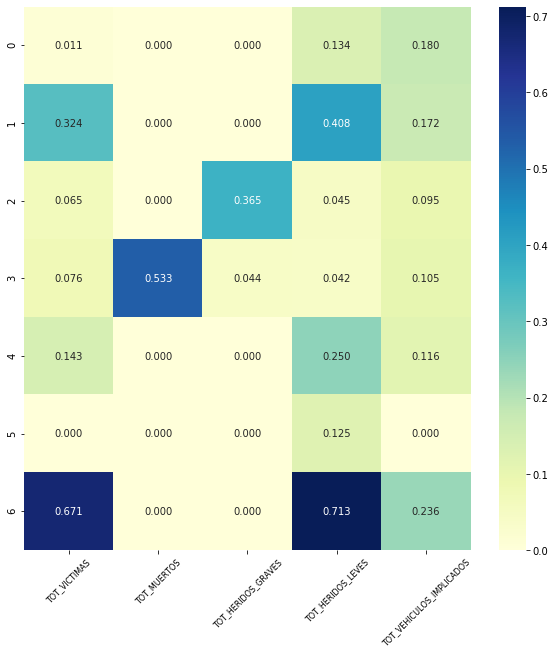

In [32]:
visualize_centroids(centroids_ag_y, data_norm_y, atributos, 1, 'agglomerative', 'entrada', k)

In [33]:
#pairplot(df_x, atributos, labels_ag_x, 1, 'agglomerative', 'salida', k)

In [34]:
#pairplot(df_y, atributos, labels_ag_y, 1, 'agglomerative', 'entrada', k)

In [35]:
'''f = open("../results/case1/output.txt","a+")
f.write("\nk = "+str(k))
# centroid instances
f.write("\n---K-MEANS---\n")
f.write("1st case - TIPO_INTERSEC=ENLACE DE SALIDA: "+str(Counter(labels_x))+'\n')
f.write("1st case - TIPO_INTERSEC=ENLACE DE ENTRADA: "+str(Counter(labels_y))+'\n')
f.write("\n---AGGLOMERATIVE---"+'\n')
f.write("1st case - TIPO_INTERSEC=ENLACE DE SALIDA: "+str(Counter(labels_ag_x))+'\n')
f.write("1st case - TIPO_INTERSEC=ENLACE DE ENTRADA: "+str(Counter(labels_ag_y))+'\n')
# clustering measures
f.write("\n---K-MEANS---\n")
f.write("Case 1 - TIPO_INTERSEC=ENLACE DE SALIDA:\n")
f.write("silhouette: {:3f}\n".format(silhouette_x))
f.write("calinsky: {:3f}\n".format(calinski_x))
f.write("Case 1-TIPO_INTERSEC=ENLACE DE ENTRADA:\n")
f.write("silhouette: {:3f}\n".format(silhouette_y))
f.write("calinsky: {:3f}\n".format(calinski_y))
f.write("\n---AGGLOMERATIVE---\n")
f.write("Case 1- TIPO_INTERSEC=ENLACE DE SALIDA:\n")
f.write("silhouette: {:3f}\n".format(silhouette_ag_x))
f.write("calinsky: {:3f}\n".format(calinski_ag_x))
f.write("Case 1- TIPO_INTERSEC=ENLACE DE ENTRADA:\n")
f.write("silhouette: {:3f}\n".format(silhouette_ag_y))
f.write("calinsky: {:3f}\n".format(calinski_ag_y))
f.close()'''

'f = open("../results/case1/output.txt","a+")\nf.write("\nk = "+str(k))\n# centroid instances\nf.write("\n---K-MEANS---\n")\nf.write("1st case - TIPO_INTERSEC=ENLACE DE SALIDA: "+str(Counter(labels_x))+\'\n\')\nf.write("1st case - TIPO_INTERSEC=ENLACE DE ENTRADA: "+str(Counter(labels_y))+\'\n\')\nf.write("\n---AGGLOMERATIVE---"+\'\n\')\nf.write("1st case - TIPO_INTERSEC=ENLACE DE SALIDA: "+str(Counter(labels_ag_x))+\'\n\')\nf.write("1st case - TIPO_INTERSEC=ENLACE DE ENTRADA: "+str(Counter(labels_ag_y))+\'\n\')\n# clustering measures\nf.write("\n---K-MEANS---\n")\nf.write("Case 1 - TIPO_INTERSEC=ENLACE DE SALIDA:\n")\nf.write("silhouette: {:3f}\n".format(silhouette_x))\nf.write("calinsky: {:3f}\n".format(calinski_x))\nf.write("Case 1-TIPO_INTERSEC=ENLACE DE ENTRADA:\n")\nf.write("silhouette: {:3f}\n".format(silhouette_y))\nf.write("calinsky: {:3f}\n".format(calinski_y))\nf.write("\n---AGGLOMERATIVE---\n")\nf.write("Case 1- TIPO_INTERSEC=ENLACE DE SALIDA:\n")\nf.write("silhouette: {:3f}

In [38]:
#salida
#kmeans
#agg

#k 3
km3 = Counter({1: 441, 0: 300, 2: 66})
agg3 = Counter({1: 435, 2: 291, 0: 81})
#k 4
km4 = Counter({1: 436, 0: 291, 2: 62, 3: 18})
agg4 = Counter({1: 435, 2: 291, 0: 63, 3: 18})
#k 5
km5 = Counter({0: 436, 3: 291, 2: 61, 1: 18, 4: 1})
agg5 = Counter({0: 435, 2: 291, 3: 62, 1: 18, 4: 1})
#k 6
km6 = Counter({2: 342, 0: 291, 1: 94, 4: 61, 5: 18, 3: 1})
agg6 = Counter({5: 342, 2: 291, 0: 93, 3: 62, 1: 18, 4: 1})
#k 7
km7 = Counter({1: 342, 0: 291, 4: 89, 2: 59, 3: 18, 5: 7, 6: 1})
agg7 = Counter({5: 342, 2: 291, 3: 86, 1: 62, 0: 18, 6: 7, 4: 1})

<BarContainer object of 3 artists>

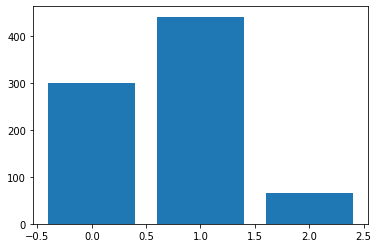

In [49]:
plt.bar(km3.keys(), km3.values())

<BarContainer object of 3 artists>

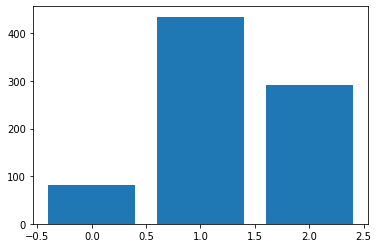

In [50]:
plt.bar(agg3.keys(), agg3.values())

<BarContainer object of 4 artists>

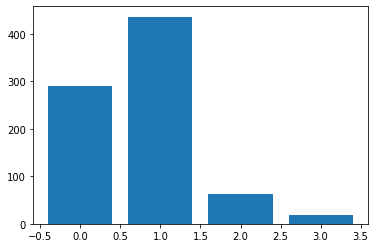

In [51]:
plt.bar(km4.keys(), km4.values())

<BarContainer object of 4 artists>

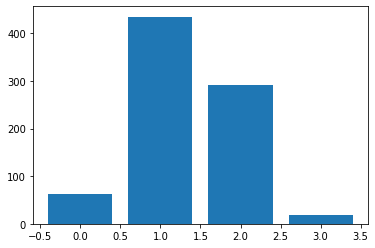

In [52]:
plt.bar(agg4.keys(), agg4.values())

<BarContainer object of 5 artists>

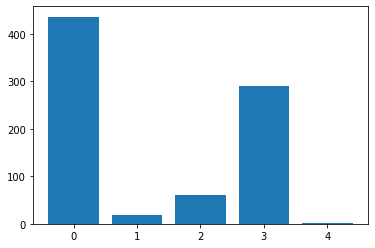

In [53]:
plt.bar(km5.keys(), km5.values())

<BarContainer object of 5 artists>

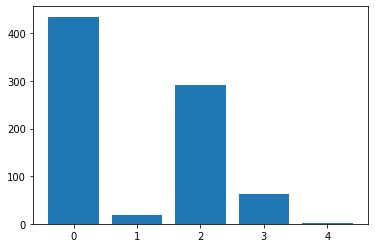

In [54]:
plt.bar(agg5.keys(), agg5.values())

<BarContainer object of 6 artists>

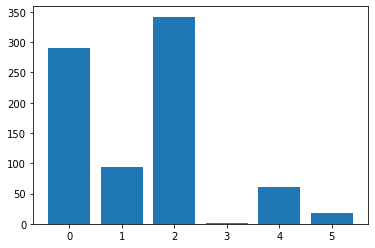

In [56]:
plt.bar(km6.keys(), km6.values())

<BarContainer object of 6 artists>

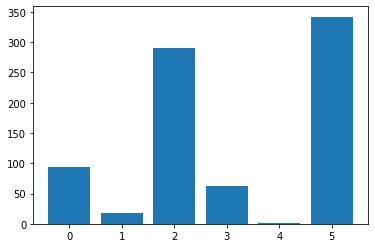

In [57]:
plt.bar(agg6.keys(), agg6.values())

<BarContainer object of 7 artists>

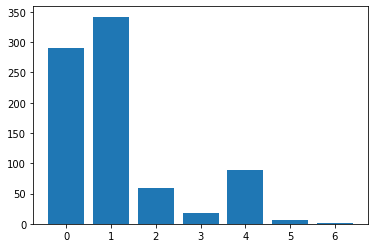

In [58]:
plt.bar(km7.keys(), km7.values())

<BarContainer object of 7 artists>

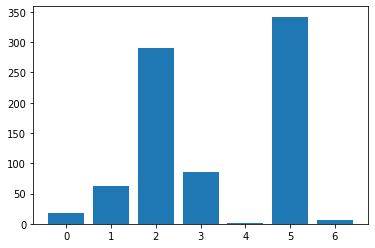

In [59]:
plt.bar(agg7.keys(), agg7.values())

In [60]:
#entrada
#kmeans
#agg

km3 = Counter({0: 1041, 1: 142, 2: 103})
agg3 = Counter({0: 1044, 1: 137, 2: 105})
#k 4
km4 = Counter({0: 808, 2: 320, 3: 103, 1: 55})
agg4 = Counter({0: 768, 1: 276, 3: 137, 2: 105})
#k 5
km5 = Counter({0: 542, 2: 320, 4: 266, 3: 103, 1: 55})
agg5 = Counter({3: 578, 0: 276, 4: 190, 1: 137, 2: 105})
#k 6
km6 = Counter({2: 541, 0: 266, 5: 234, 1: 118, 3: 104, 4: 23})
agg6 = Counter({1: 578, 5: 261, 4: 190, 0: 137, 2: 105, 3: 15})
#k 7
km7 = Counter({2: 535, 0: 261, 5: 233, 1: 118, 3: 102, 4: 23, 6: 14})
agg7 = Counter({0: 578, 5: 261, 4: 190, 1: 117, 2: 105, 6: 20, 3: 15})

<BarContainer object of 3 artists>

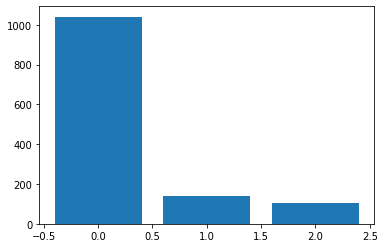

In [61]:
plt.bar(km3.keys(), km3.values())

<BarContainer object of 3 artists>

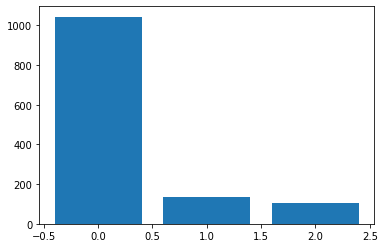

In [62]:
plt.bar(agg3.keys(), agg3.values())

<BarContainer object of 4 artists>

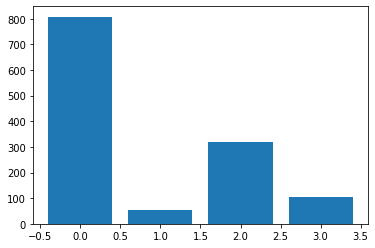

In [63]:
plt.bar(km4.keys(), km4.values())

<BarContainer object of 4 artists>

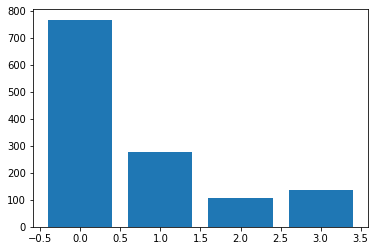

In [64]:
plt.bar(agg4.keys(), agg4.values())

<BarContainer object of 5 artists>

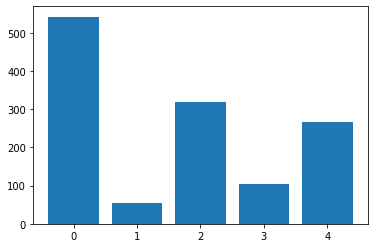

In [66]:
plt.bar(km5.keys(), km5.values())

<BarContainer object of 5 artists>

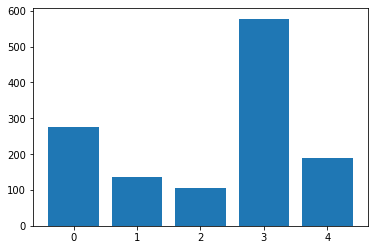

In [67]:
plt.bar(agg5.keys(), agg5.values())

<BarContainer object of 6 artists>

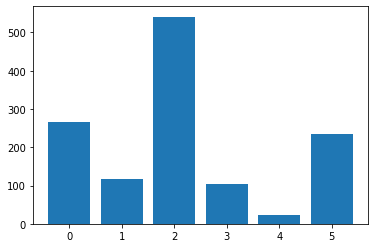

In [68]:
plt.bar(km6.keys(), km6.values())

<BarContainer object of 6 artists>

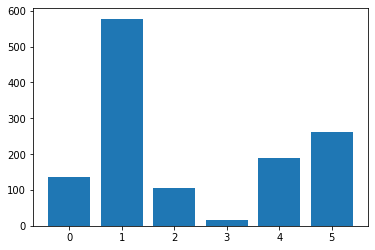

In [69]:
plt.bar(agg6.keys(), agg6.values())

<BarContainer object of 7 artists>

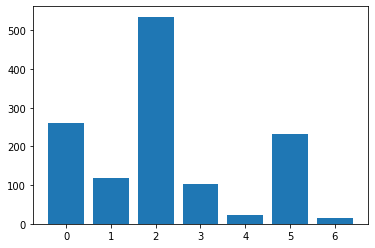

In [70]:
plt.bar(km7.keys(), km7.values())

<BarContainer object of 7 artists>

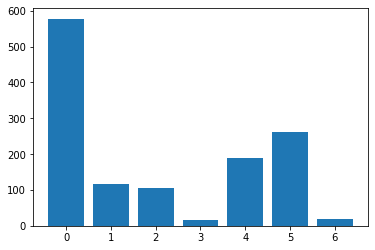

In [71]:
plt.bar(agg7.keys(), agg7.values())